In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data source and Assumption**
 

*   The data for this project has been taken from JIRA against SAC customers. All, the issues are customer reported. 
*   The churned customers are identified from the revenue cube by identifying customers which were there in the year 2021 but are missing in the year 2022.





 


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [14]:
# reading the dataframe
df = pd.read_csv("/content/sample_data/Customer_Jira_Data.csv", na_values=['(NA)']).fillna(0)
df.head()

,Customer_name,Total_P1_issues,Total_P2_issues,Total_issues,Total_P1_%,Total_P2_%,Total_components,New_Feature_request%,Days_taken_on_P1_issue_%,Days_taken_on_P2_issue_%,Days_Spent_on_P1_Issues,Days_Spent_on_P2_Issues,Total_days_taken,Churn
0,[Isaac_Lorios]_Service_de_Police_de_la_Ville_d...,0,1,1,0.000000,1.000000,3,0.0,0.000000,1.000000,0,12,12,0
1,ABB_INFORMATION_SYSTEMS_LTD,0,1,1,0.000000,1.000000,1,0.0,0.000000,1.000000,0,10,10,0
2,ASKON-INTERNATIONAL-S.R.O,1,0,1,1.000000,0.000000,0,1.0,1.000000,0.000000,278,0,278,0
3,ASSECO-SEE,4,2,6,0.666667,0.333333,8,1.0,0.433884,0.566116,210,274,484,1
4,Australian_Government,1,0,1,1.000000,0.000000,1,1.0,1.000000,0.000000,49,0,49,0


In [15]:
# basics of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_name             120 non-null    object 
 1   Total_P1_issues           120 non-null    int64  
 2   Total_P2_issues           120 non-null    int64  
 3   Total_issues              120 non-null    int64  
 4   Total_P1_%                120 non-null    float64
 5   Total_P2_%                120 non-null    float64
 6    Total_components         120 non-null    int64  
 7   New_Feature_request%      120 non-null    float64
 8   Days_taken_on_P1_issue_%  120 non-null    float64
 9   Days_taken_on_P2_issue_%  120 non-null    float64
 10  Days_Spent_on_P1_Issues   120 non-null    int64  
 11  Days_Spent_on_P2_Issues   120 non-null    int64  
 12  Total_days_taken          120 non-null    int64  
 13  Churn                     120 non-null    int64  
dtypes: float64

In [16]:
#Round floating point values to 2 decimal places
df['Total_P1_%']=round(df["Total_P1_%"],2)
df['Total_P2_%']=round(df["Total_P2_%"],2)
df['New_Feature_request%']=round(df["New_Feature_request%"],2)
df['Days_taken_on_P1_issue_%']=round(df["Days_taken_on_P1_issue_%"],2)
df['Days_taken_on_P2_issue_%']=round(df["Days_taken_on_P2_issue_%"],2)
df.head()

,Customer_name,Total_P1_issues,Total_P2_issues,Total_issues,Total_P1_%,Total_P2_%,Total_components,New_Feature_request%,Days_taken_on_P1_issue_%,Days_taken_on_P2_issue_%,Days_Spent_on_P1_Issues,Days_Spent_on_P2_Issues,Total_days_taken,Churn
0,[Isaac_Lorios]_Service_de_Police_de_la_Ville_d...,0,1,1,0.00,1.00,3,0.0,0.00,1.00,0,12,12,0
1,ABB_INFORMATION_SYSTEMS_LTD,0,1,1,0.00,1.00,1,0.0,0.00,1.00,0,10,10,0
2,ASKON-INTERNATIONAL-S.R.O,1,0,1,1.00,0.00,0,1.0,1.00,0.00,278,0,278,0
3,ASSECO-SEE,4,2,6,0.67,0.33,8,1.0,0.43,0.57,210,274,484,1
4,Australian_Government,1,0,1,1.00,0.00,1,1.0,1.00,0.00,49,0,49,0


In [17]:
#renamed column
df = df.rename(columns={' Total_components': 'Total_components'})
df.head()

,Customer_name,Total_P1_issues,Total_P2_issues,Total_issues,Total_P1_%,Total_P2_%,Total_components,New_Feature_request%,Days_taken_on_P1_issue_%,Days_taken_on_P2_issue_%,Days_Spent_on_P1_Issues,Days_Spent_on_P2_Issues,Total_days_taken,Churn
0,[Isaac_Lorios]_Service_de_Police_de_la_Ville_d...,0,1,1,0.00,1.00,3,0.0,0.00,1.00,0,12,12,0
1,ABB_INFORMATION_SYSTEMS_LTD,0,1,1,0.00,1.00,1,0.0,0.00,1.00,0,10,10,0
2,ASKON-INTERNATIONAL-S.R.O,1,0,1,1.00,0.00,0,1.0,1.00,0.00,278,0,278,0
3,ASSECO-SEE,4,2,6,0.67,0.33,8,1.0,0.43,0.57,210,274,484,1
4,Australian_Government,1,0,1,1.00,0.00,1,1.0,1.00,0.00,49,0,49,0


In [18]:
col_names = ["Total_P1_issues", "Total_P2_issues", "Total_issues", "Days_Spent_on_P1_Issues", "Days_Spent_on_P2_Issues", "Total_days_taken"  ]
for c in col_names:
    if c in df.columns:
        df.drop(c, axis=1, inplace=True)
df.head()        

,Customer_name,Total_P1_%,Total_P2_%,Total_components,New_Feature_request%,Days_taken_on_P1_issue_%,Days_taken_on_P2_issue_%,Churn
0,[Isaac_Lorios]_Service_de_Police_de_la_Ville_d...,0.00,1.00,3,0.0,0.00,1.00,0
1,ABB_INFORMATION_SYSTEMS_LTD,0.00,1.00,1,0.0,0.00,1.00,0
2,ASKON-INTERNATIONAL-S.R.O,1.00,0.00,0,1.0,1.00,0.00,0
3,ASSECO-SEE,0.67,0.33,8,1.0,0.43,0.57,1
4,Australian_Government,1.00,0.00,1,1.0,1.00,0.00,0


**Exploratory Data Analysis (EDA)**

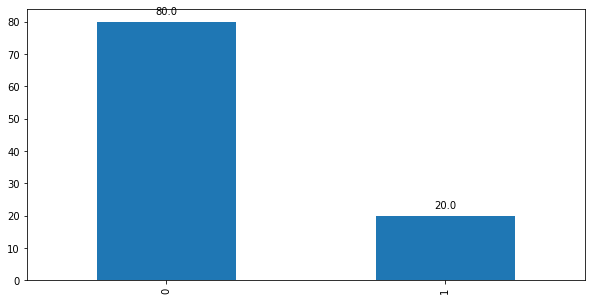

In [19]:
#Check imbalance of the dependent variable
plt.figure(figsize = (10,5))
value_counts = np.round(df['Churn'].value_counts(normalize=True) * 100.0,2)
ax = value_counts.plot.bar()
for p in ax.patches:                 
    ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')
plt.show()

From above it is clear that the **data** is** highly imbalanced** and hence while **trainng the model we need to keep class imbalance in mind**. We see that **80% of customers are retained and only 20% percent customers have churned out.**

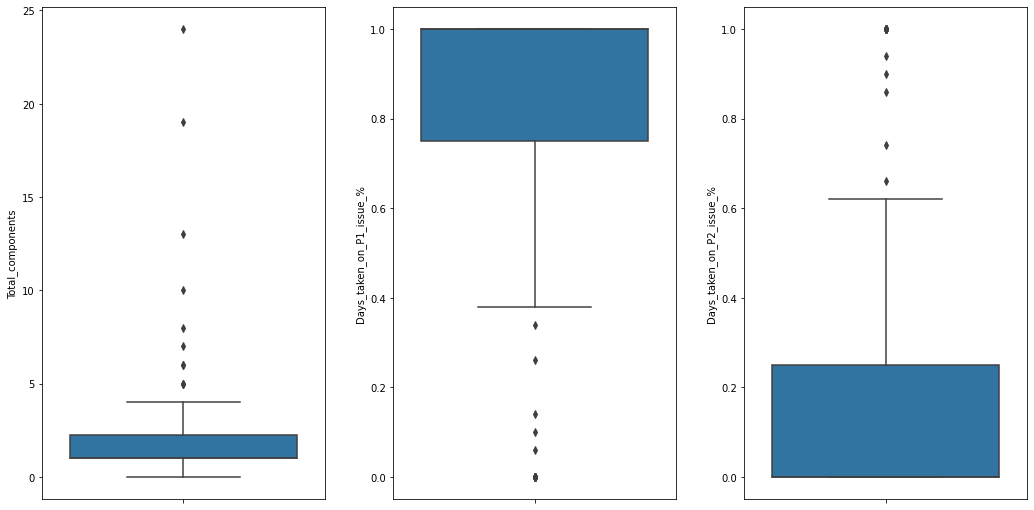

In [20]:
#Plot box plot to visualise outliers
plt.figure(figsize=[15,15])
plt.subplot(2,3,1)
sns.boxplot(y=df['Total_components'])
plt.subplot(2,3,2)
sns.boxplot(y=df['Days_taken_on_P1_issue_%'])
plt.subplot(2,3,3)
sns.boxplot(y=df['Days_taken_on_P2_issue_%'])
plt.tight_layout(pad=3.0)
plt.show()

**From the above box plot, we see that for each customer, the average number of components is around 2-3, around 90% of the total time has gone into solving P1 issues and 10% of timing has gone to solve P2 issues**. However there are few outliers, but we won't be treating them as they are necessary for churn prediction.

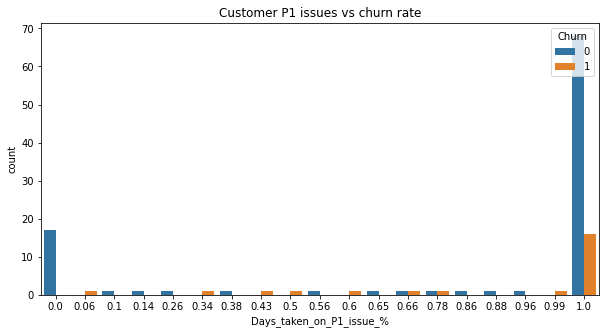

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(df['Days_taken_on_P1_issue_%'],hue=df["Churn"])
plt.title("Customer P1 issues vs churn rate")
plt.show()

From the above plots , **we see that when days taken in percentage for P1 issues are less than 50% for a given customer**, **there is a possibility for customer to not churn**. Whereas in cases when 100% of total time has been speny on P1 issues, the customer has churned. **We see that the number of churned customers for 100% time taken is around 15.**

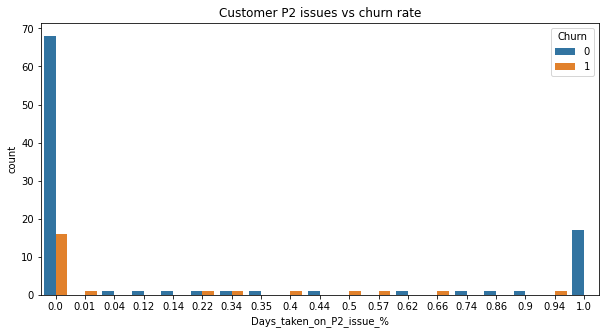

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(df['Days_taken_on_P2_issue_%'],hue=df["Churn"])
plt.title("Customer P2 issues vs churn rate")
plt.show()

**We see that the customer has churned for P2 when no effort has been given to their issues in terms of days.**

In [23]:
df['Components_group']= pd.cut(df['Total_components'], bins=[0,5,10,20,30], labels=['<5','5-10','10-20','20+'])
df['Components_group'] = df['Components_group'].astype('object')
df['Components_group'].value_counts()

<5       88
5-10      5
10-20     2
20+       1
Name: Components_group, dtype: int64

In [24]:
df.head()

,Customer_name,Total_P1_%,Total_P2_%,Total_components,New_Feature_request%,Days_taken_on_P1_issue_%,Days_taken_on_P2_issue_%,Churn,Components_group
0,[Isaac_Lorios]_Service_de_Police_de_la_Ville_d...,0.00,1.00,3,0.0,0.00,1.00,0,<5
1,ABB_INFORMATION_SYSTEMS_LTD,0.00,1.00,1,0.0,0.00,1.00,0,<5
2,ASKON-INTERNATIONAL-S.R.O,1.00,0.00,0,1.0,1.00,0.00,0,NaN
3,ASSECO-SEE,0.67,0.33,8,1.0,0.43,0.57,1,5-10
4,Australian_Government,1.00,0.00,1,1.0,1.00,0.00,0,<5


In [25]:
df['Components_group'] = df['Components_group'].replace(np.nan, '<5')
df.head()

,Customer_name,Total_P1_%,Total_P2_%,Total_components,New_Feature_request%,Days_taken_on_P1_issue_%,Days_taken_on_P2_issue_%,Churn,Components_group
0,[Isaac_Lorios]_Service_de_Police_de_la_Ville_d...,0.00,1.00,3,0.0,0.00,1.00,0,<5
1,ABB_INFORMATION_SYSTEMS_LTD,0.00,1.00,1,0.0,0.00,1.00,0,<5
2,ASKON-INTERNATIONAL-S.R.O,1.00,0.00,0,1.0,1.00,0.00,0,<5
3,ASSECO-SEE,0.67,0.33,8,1.0,0.43,0.57,1,5-10
4,Australian_Government,1.00,0.00,1,1.0,1.00,0.00,0,<5


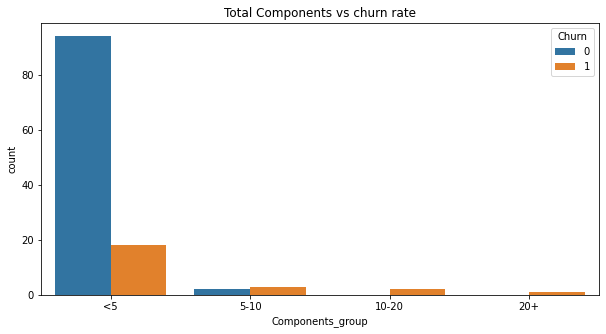

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(df['Components_group'],hue=df["Churn"])
plt.title("Total Components vs churn rate")
plt.show()

From above we see that the **customers have churned even when the issues were found in compponents with as small as less than 5 and as large as 10-20**.

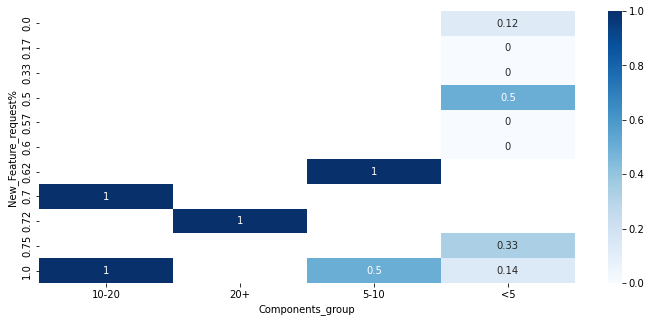

In [27]:
#No. of Issues for each customer  v/s days taken v/s churn
plt.figure(figsize=[12,5])
occupation = pd.pivot_table(df, columns='Components_group', index='New_Feature_request%', values='Churn')
sns.heatmap(occupation, annot=True, cmap='Blues')
plt.show()


From above heatmap we see that **where number of components is between 10-20 and new feature request is more than 70% , the customer has higher probability to churn.**

In [28]:
df.head()

,Customer_name,Total_P1_%,Total_P2_%,Total_components,New_Feature_request%,Days_taken_on_P1_issue_%,Days_taken_on_P2_issue_%,Churn,Components_group
0,[Isaac_Lorios]_Service_de_Police_de_la_Ville_d...,0.00,1.00,3,0.0,0.00,1.00,0,<5
1,ABB_INFORMATION_SYSTEMS_LTD,0.00,1.00,1,0.0,0.00,1.00,0,<5
2,ASKON-INTERNATIONAL-S.R.O,1.00,0.00,0,1.0,1.00,0.00,0,<5
3,ASSECO-SEE,0.67,0.33,8,1.0,0.43,0.57,1,5-10
4,Australian_Government,1.00,0.00,1,1.0,1.00,0.00,0,<5


In [29]:
# Creation of dummy variables for years_with_company
dummydf = pd.get_dummies(df['Components_group'], prefix='Components_group', drop_first=True)
df = pd.concat([df,dummydf], axis=1)
df.drop('Components_group', axis=1, inplace=True)

In [30]:
customer_df = df.copy()
customer_df.head()

,Customer_name,Total_P1_%,Total_P2_%,Total_components,New_Feature_request%,Days_taken_on_P1_issue_%,Days_taken_on_P2_issue_%,Churn,Components_group_20+,Components_group_5-10,Components_group_<5
0,[Isaac_Lorios]_Service_de_Police_de_la_Ville_d...,0.00,1.00,3,0.0,0.00,1.00,0,0,0,1
1,ABB_INFORMATION_SYSTEMS_LTD,0.00,1.00,1,0.0,0.00,1.00,0,0,0,1
2,ASKON-INTERNATIONAL-S.R.O,1.00,0.00,0,1.0,1.00,0.00,0,0,0,1
3,ASSECO-SEE,0.67,0.33,8,1.0,0.43,0.57,1,0,1,0
4,Australian_Government,1.00,0.00,1,1.0,1.00,0.00,0,0,0,1


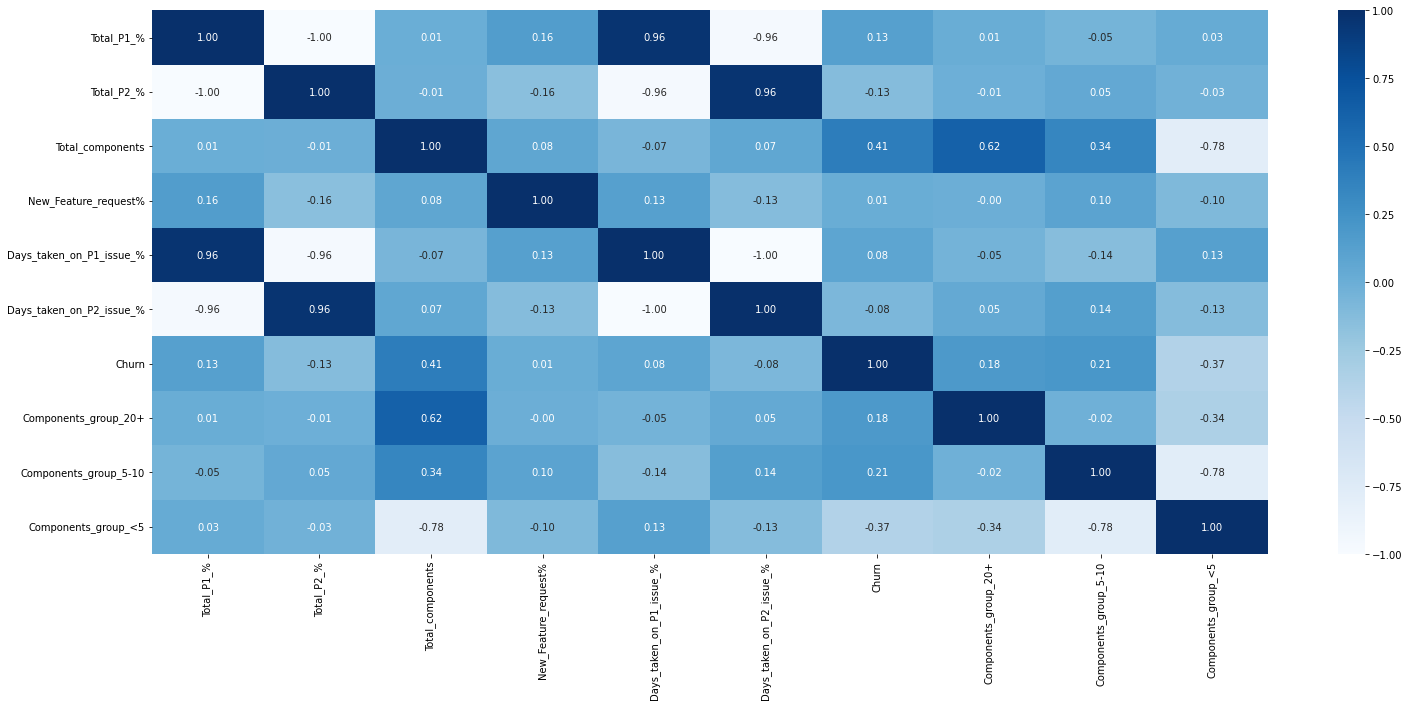

In [31]:
#Plot correlation-matrix and based on that we can drop columns.
plt.figure(figsize=[25,10])
sns.heatmap(customer_df.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.show()

In [32]:
#Dropping highly co-related columns
to_drop = ['Total_P1_%', 'Total_P2_%' ]

for c in to_drop:
    if c in customer_df.columns:
        customer_df.drop(c, axis=1, inplace=True)


In [33]:
customer_df.head()

,Customer_name,Total_components,New_Feature_request%,Days_taken_on_P1_issue_%,Days_taken_on_P2_issue_%,Churn,Components_group_20+,Components_group_5-10,Components_group_<5
0,[Isaac_Lorios]_Service_de_Police_de_la_Ville_d...,3,0.0,0.00,1.00,0,0,0,1
1,ABB_INFORMATION_SYSTEMS_LTD,1,0.0,0.00,1.00,0,0,0,1
2,ASKON-INTERNATIONAL-S.R.O,0,1.0,1.00,0.00,0,0,0,1
3,ASSECO-SEE,8,1.0,0.43,0.57,1,0,1,0
4,Australian_Government,1,1.0,1.00,0.00,0,0,0,1


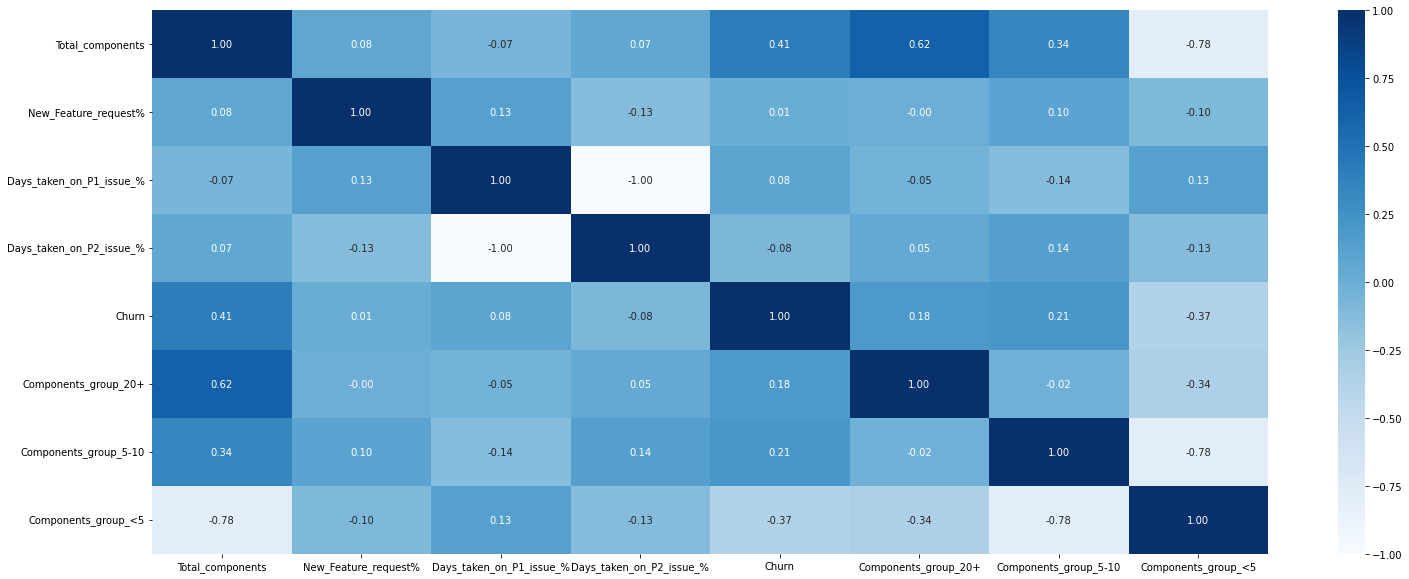

In [34]:
plt.figure(figsize=[25,10])
sns.heatmap(customer_df.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.show()

**Creating Training and Test Data**

In [35]:
customer_df.head()

,Customer_name,Total_components,New_Feature_request%,Days_taken_on_P1_issue_%,Days_taken_on_P2_issue_%,Churn,Components_group_20+,Components_group_5-10,Components_group_<5
0,[Isaac_Lorios]_Service_de_Police_de_la_Ville_d...,3,0.0,0.00,1.00,0,0,0,1
1,ABB_INFORMATION_SYSTEMS_LTD,1,0.0,0.00,1.00,0,0,0,1
2,ASKON-INTERNATIONAL-S.R.O,0,1.0,1.00,0.00,0,0,0,1
3,ASSECO-SEE,8,1.0,0.43,0.57,1,0,1,0
4,Australian_Government,1,1.0,1.00,0.00,0,0,0,1


In [36]:
customer_df.shape

(120, 9)

In [37]:
# Test-Train Split and Scaling
# Putting features variable to X
jira_X = customer_df.drop(['Customer_name','Churn'], axis=1)
# Putting response variable to y
jira_y = customer_df['Churn']
jira_X.shape, jira_y.shape

((120, 7), (120,))

In [38]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(jira_X, jira_y, train_size=0.7, test_size=0.3, random_state=100)

**Scaling Data**

In [39]:
#Scaling the numeric columns
X_num = X_train.select_dtypes(include=['float64', 'int64'])
X_num.columns

Index(['Total_components', 'New_Feature_request%', 'Days_taken_on_P1_issue_%',
       'Days_taken_on_P2_issue_%'],
      dtype='object')

In [40]:
#Scaling numeric continuous variables
from sklearn.preprocessing import StandardScaler
num_values = X_num.columns
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
# For the test set we only transform
X_test[num_values] = scaler.transform(X_test[num_values])

In [41]:
X_train

,Total_components,New_Feature_request%,Days_taken_on_P1_issue_%,Days_taken_on_P2_issue_%,Components_group_20+,Components_group_5-10,Components_group_<5
95,0.285498,0.593028,0.492567,-0.492567,0,0,1
102,-0.399697,0.593028,0.492567,-0.492567,0,0,1
20,-0.742295,0.593028,0.492567,-0.492567,0,0,1
41,3.711473,-0.190216,-0.977781,0.977781,0,0,0
6,-0.399697,0.593028,0.492567,-0.492567,0,0,1
...,...,...,...,...,...,...,...
87,-0.057100,-2.017786,0.492567,-0.492567,0,0,1
103,-0.399697,-2.017786,0.492567,-0.492567,0,0,1
67,2.683681,-0.399082,-0.507270,0.507270,0,1,0
24,-0.399697,0.593028,0.492567,-0.492567,0,0,1



Recall tells us about how well the model identifies true positives. Out of all the patients who have the disease, how many were correctly identified?

                    Predicted    Predicted
                     Yes           No
                      1             0 
 Actual Yes(1)  -    TP            FN

 Actual No(0)   -    FP            TN   

 Recall = TP/ (FN + TP)          


Precision is a metric that tells us about the quality of positive predictions. Out of everyone predicted to have the disease, how many of them actually have it?
 Precision = TP/ (TP+FP)
https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62



**Model Building with RandomForest using GridSearchCV**

In [42]:
# We use hyper parameter tuning to choose the best parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
param_grid = {
    'max_depth': [3,5,8],
    'min_samples_leaf': [3,5,7],
    'n_estimators': [3,5,7,10]
}
dtc = RandomForestClassifier(random_state=73, oob_score=True, n_jobs=-1, class_weight='balanced')
grid = GridSearchCV(dtc,  n_jobs=-1, scoring='recall', param_grid=param_grid, cv=5, verbose=1)
grid.fit(X_train, y_train)
best_est = grid.best_estimator_
best_est

Fitting 5 folds for each of 36 candidates, totalling 180 fits


RandomForestClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=7,
                       n_estimators=10, n_jobs=-1, oob_score=True,
                       random_state=73)

In [43]:
#Checking the recall score for the best estimator
y_train_pred = best_est.predict(X_train)
y_test_pred = best_est.predict(X_test)
print(recall_score(y_train, y_train_pred))
print(recall_score(y_test, y_test_pred))

0.7857142857142857
0.3


In [44]:
recall_train_rf = recall_score(y_train, y_train_pred)
recall_test_rf = recall_score(y_test, y_test_pred)

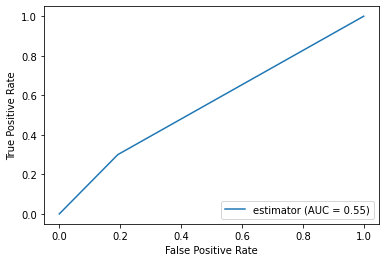

In [45]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='estimator')
display.plot()
plt.show()

Logistic regression Model


In [46]:
#Importing modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=5)       
rfe = rfe.fit(X_train, y_train)
pd.DataFrame(data={'Column':X_train.columns,'Supported':rfe.support_,'Ranking':rfe.ranking_}).sort_values(by=['Ranking','Column'])

,Column,Supported,Ranking
5,Components_group_5-10,True,1
6,Components_group_<5,True,1
2,Days_taken_on_P1_issue_%,True,1
3,Days_taken_on_P2_issue_%,True,1
0,Total_components,True,1
1,New_Feature_request%,False,2
4,Components_group_20+,False,3


In [48]:
#List of column names that are chosen in RFE
col = X_train.columns[rfe.support_]
col

Index(['Total_components', 'Days_taken_on_P1_issue_%',
       'Days_taken_on_P2_issue_%', 'Components_group_5-10',
       'Components_group_<5'],
      dtype='object')

In [49]:
# Method to perform logistic regression on y_train using training data X
# It displays the LR summary and the VIF for the indenpendent variables
def logistic_regression(X):
    # Add the constant
    X_scaled = sm.add_constant(X)
    # Create and fit the model
    logm = sm.GLM(y_train, X_scaled, family = sm.families.Binomial())
    model = logm.fit()
    # Check the paramters
    print(model.summary())
    # Draw a VIF table
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print('\n')
    print(vif)
    return model

In [50]:
#Creating Model 1
logistic_regression(X_train[col])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                   84
Model:                            GLM   Df Residuals:                       79
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 15 Mar 2023   Deviance:                       46.260
Time:                        19:43:25   Pearson chi2:                     62.2
No. Iterations:                    27   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [51]:
col = col.drop(['Days_taken_on_P1_issue_%', 'Days_taken_on_P2_issue_%'])
col

Index(['Total_components', 'Components_group_5-10', 'Components_group_<5'], dtype='object')

In [52]:
#Creating Model 2
final_model = logistic_regression(X_train[col])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                   84
Model:                            GLM   Df Residuals:                       80
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27.985
Date:                Wed, 15 Mar 2023   Deviance:                       55.970
Time:                        19:43:25   Pearson chi2:                     84.6
No. Iterations:                    20   Pseudo R-squ. (CS):             0.2093
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    14.22

In [53]:
# We use absolute values for the co-efficients to ignore sign difference 
important_feature = np.abs(final_model.params[1:])
important_feature = 100.0 * (important_feature / important_feature.max())
important_feature

Total_components          10.171055
Components_group_5-10    100.000000
Components_group_<5       95.779901
dtype: float64

In [54]:
sorted_idx = np.argsort(important_feature,kind='quicksort')
sorted_idx

Total_components         0
Components_group_5-10    2
Components_group_<5      1
dtype: int64

<Figure size 360x360 with 0 Axes>

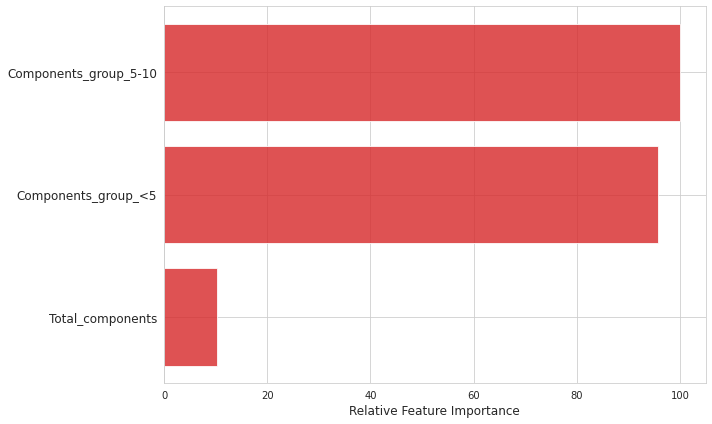

In [90]:
fig = plt.figure(figsize = (5,5))
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, important_feature[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=12)

plt.tight_layout()   
plt.show()

**Model Evaluaion**

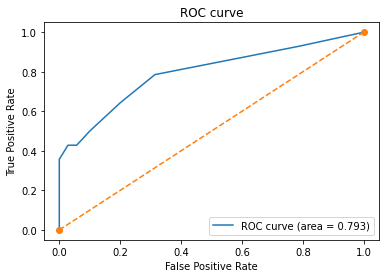

0.7928571428571428


In [56]:
#Plotting the ROC curve.
from sklearn.metrics import roc_curve, roc_auc_score
X_train_sm = sm.add_constant(X_train[col])
y_pred = final_model.predict(X_train_sm)
fpr, tpr, threshold = roc_curve(y_train,y_pred)
auc_score = roc_auc_score(y_train,y_pred)
plt.plot(fpr,tpr, label='ROC curve (area = %0.3f)' % auc_score )
plt.plot([0,1],[0,1], 'o--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print(auc_score)

In [57]:
import pickle
pickle.dump(final_model, open('model_LR.pkl', 'wb'))
pickled_model = pickle.load(open('model_LR.pkl', 'rb'))

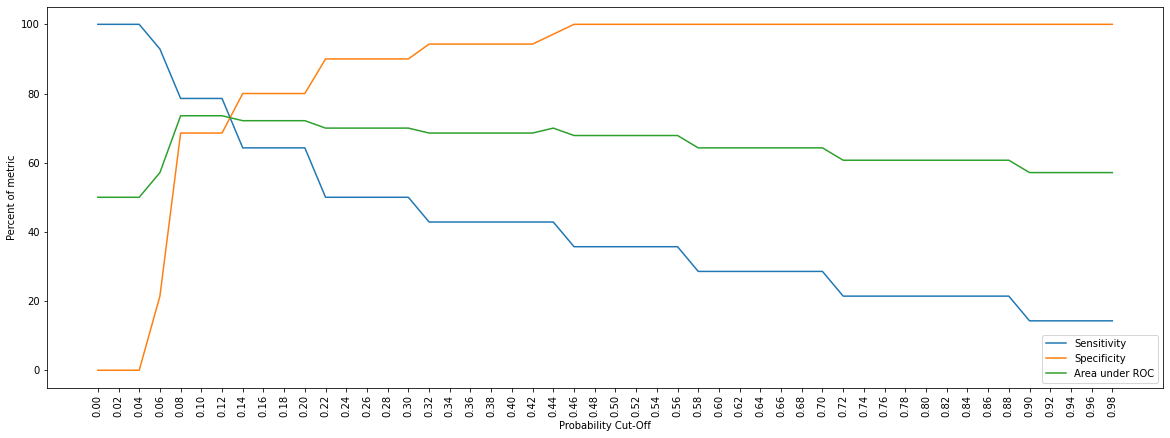

,Sensitivity,Specificity,Area under ROC
0.12,78.571429,68.571429,73.571429


In [58]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_curve
X_train_scaled = sm.add_constant(X_train[col])
train_pred = final_model.predict(X_train_scaled)
cutoff_df = pd.DataFrame( columns = ['Sensitivity','Specificity', 'Area under ROC'])
# We will try cut offs between 0 and 1 with intervals of 0.02
cut_off_options = np.arange(0.0,1,0.02)
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
for c in cut_off_options:
    # Actual predicted labels
    y_train_pred_label = train_pred.map(lambda x: 1 if x > c else 0)
    # Confusion matrix for the cut off
    cm = confusion_matrix(y_train, y_train_pred_label)
    # Calculate the sensitivity as TP / (TP + FN)
    sensitivity = cm[1,1] / (cm[1,1] + cm[1,0])
    # Calculate the specificity as TN / (TN + FP)
    specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    # Calculate the Area under ROC
    auc = roc_auc_score(y_train, y_train_pred_label)
    # Create the row for the DF
    cutoff_df.loc[c] = [sensitivity * 100.0, specificity * 100.0, auc * 100.0]
cutoff_df.plot(figsize=[20,7])
plt.xticks(cut_off_options, rotation='vertical')
plt.xlabel('Probability Cut-Off')
plt.ylabel('Percent of metric')
plt.show()
idx = np.argwhere(np.diff(np.sign(cutoff_df.Sensitivity - cutoff_df.Specificity))).flatten()
cutoff_df.iloc[idx]

**So here we can see that with a probability cut-off of 0.12**, we can achieve a high level of Sensitity for our model and at the same time also acceptable Specificity

Now lets try to see how our model performs on the test set 

In [59]:
choosen_cut_off = 0.65

In [60]:
X_test_scaled = sm.add_constant(X_test[col])
y_test_pred = pickled_model.predict(X_test_scaled)
y_test_pred_label = y_test_pred.map(lambda x: 1 if x > choosen_cut_off else 0)
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_label)
# Calculate the sensitivity as TP / (TP + FN)
sensitivity = cm[1,1] / (cm[1,1] + cm[1,0])
print('Sensitivity on Test set {}'.format(sensitivity))
print('Accuracy on Test set {}'.format(accuracy_score(y_test, y_test_pred_label)))

Sensitivity on Test set 0.1
Accuracy on Test set 0.75


**For our model, the lead score is defined as:**

  **Probability of Conversion * 100**

In [61]:
#Calculate the lead scores for train data
choosen_cut_off_train = 0.12
train_score_df = pd.DataFrame()
train_score_df['Customer_name'] = df.iloc[y_train.index]['Customer_name']
train_score_df['Actual Conversion Status'] = y_train
train_score_df['Predicted Conversion Status'] = train_pred.map(lambda x: 1 if x > choosen_cut_off_train else 0)
train_score_df['Probability Score'] = np.round(train_pred * 100.0, decimals=2)
train_score_df.head()

,Customer_name,Actual Conversion Status,Predicted Conversion Status,Probability Score
95,SECRETARIAT_GENERAL_DEFENSE_SECU_NAT,0,1,20.48
102,"TDSB,_Toronto_Police_Services_(TPS)",0,0,7.41
20,Comda,0,0,4.27
41,Entrust_Datacard_Corporation,1,1,100.00
6,Bae-Systems-Applied-Intelligence-(Asia-Pacific...,0,0,7.41


In [62]:
#Calculate the lead scores for test data
choosen_cut_off_test = 0.65
test_score_df = pd.DataFrame()
test_score_df['Customer_name'] = df.iloc[y_test.index]['Customer_name']
test_score_df['Actual Conversion Status'] = y_test
test_score_df['Predicted Conversion Status'] = y_test_pred.map(lambda x: 1 if x > choosen_cut_off else 0)
test_score_df['Probability Score'] = np.round(y_test_pred * 100.0, decimals=2)
test_score_df.head()

,Customer_name,Actual Conversion Status,Predicted Conversion Status,Probability Score
69,Montreal_Police,0,0,12.56
54,idopte,0,0,20.48
37,ECB_European_Central_Bank,0,0,4.27
46,FRB,0,0,12.56
106,Thales-Internal,1,1,100.00


In [63]:
#Combining the scores for train and test
Probability_df = pd.concat([train_score_df, test_score_df])
Probability_df.set_index('Customer_name', inplace=True)
Probability_df.head()

,Actual Conversion Status,Predicted Conversion Status,Probability Score
Customer_name,,,
SECRETARIAT_GENERAL_DEFENSE_SECU_NAT,0,1,20.48
"TDSB,_Toronto_Police_Services_(TPS)",0,0,7.41
Comda,0,0,4.27
Entrust_Datacard_Corporation,1,1,100.00
Bae-Systems-Applied-Intelligence-(Asia-Pacific)-Pte-Ltd,0,0,7.41


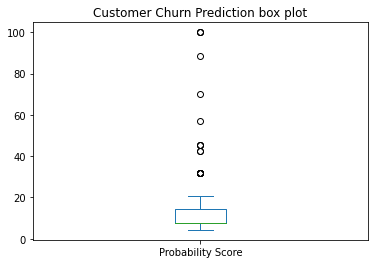

In [64]:
Probability_df['Probability Score'].plot(kind='box')
plt.title('Customer Churn Prediction box plot')
plt.show()

In [65]:
Probability_df['Probability Score'].describe()

count    120.000000
mean      15.641417
std       19.248046
min        4.270000
25%        7.410000
50%        7.410000
75%       14.540000
max      100.000000
Name: Probability Score, dtype: float64

In [66]:
#Overall accuracy and sensitivity across train and test set
y_actual = Probability_df['Actual Conversion Status']
y_predicted = Probability_df['Predicted Conversion Status']
cm = confusion_matrix(y_actual, y_predicted)
# Calculate the sensitivity as TP / (TP + FN)
sensitivity = cm[1,1] / (cm[1,1] + cm[1,0])
print('Oveall Sensitivity {}'.format(sensitivity))
print('Overall Accuracy {}'.format(accuracy_score(y_actual, y_predicted)))

Oveall Sensitivity 0.5
Overall Accuracy 0.7166666666666667


**We have a fairly good Accuracy of 71%**

**OTHER MODELS**

**Checking Model Performance by applying dimension reduction technique of PCA(Principal Component Analysis)**

In [67]:
from sklearn.decomposition import PCA
pca = PCA(random_state=73)
pca.fit(X_train)
print(pca.components_)

[[ 7.28632681e-02 -2.38154400e-01 -6.83635250e-01  6.83635250e-01
  -0.00000000e+00  3.63688697e-02 -4.40047834e-02]
 [ 8.29185367e-01  5.09278990e-01 -3.52984833e-02  3.52984833e-02
  -0.00000000e+00  1.07752737e-01 -1.97443457e-01]
 [ 4.98513367e-01 -8.26369639e-01  1.73962003e-01 -1.73962003e-01
  -0.00000000e+00  2.58360562e-02 -8.60499000e-02]
 [-2.15707202e-01 -3.20902133e-02  3.34533521e-02 -3.34533521e-02
   0.00000000e+00  7.91861638e-01 -5.68469449e-01]
 [-1.09988168e-01 -9.11388739e-04  3.86741787e-03 -3.86741787e-03
  -0.00000000e+00 -5.99461673e-01 -7.92790994e-01]
 [ 0.00000000e+00 -2.70529784e-17 -7.06980828e-01 -7.06980828e-01
   1.88737567e-02  1.86109865e-16  1.00093925e-16]
 [ 0.00000000e+00 -2.36562649e-17  1.33457614e-02  1.33457614e-02
   9.99821875e-01  1.62633854e-16  6.93582007e-17]]


In [68]:
#Checking the explained variation
print(np.round(pca.explained_variance_ratio_,3))

[0.503 0.271 0.209 0.015 0.001 0.    0.   ]


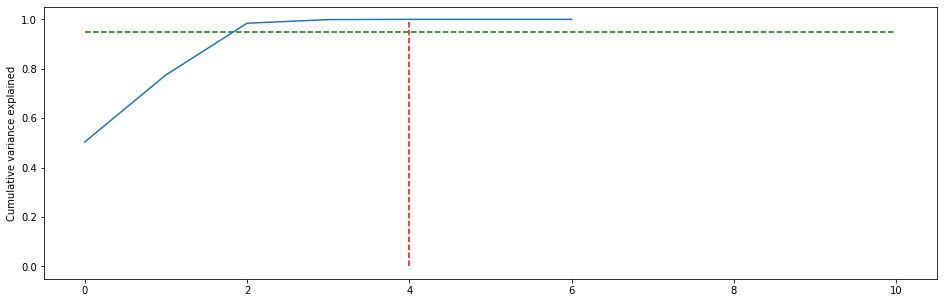

In [69]:
#Plotting the Cumulative explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[16,5])
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=10, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [70]:
# No. of components chosen
n_components = 4

In [71]:
# We do incremental PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=n_components)
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)
X_train_pca.shape, X_test_pca.shape

((84, 4), (36, 4))

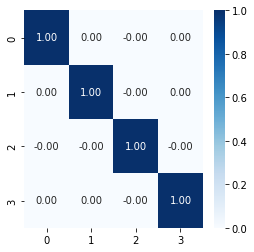

In [72]:
# Checking for co-relation between principal components
corrmat = np.corrcoef(X_train_pca.transpose())
plt.figure(figsize=[n_components,n_components])
sns.heatmap(corrmat, annot=True, fmt='.2f', cmap='Blues')
plt.show()

In [73]:
from sklearn.model_selection import GridSearchCV

# Function that performs Grid Search CV for a model and returns the best estimator
def grid_search(model, param_grid):
    grid = GridSearchCV(model, param_grid = param_grid, scoring = 'recall', cv = 5, verbose=True, n_jobs=-1)
    grid.fit(X_train_pca, y_train)
    print('Best Parameters {}'.format(grid.best_params_))
    print('Best Score {} '.format(grid.best_score_))
    return grid.best_estimator_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Text(0.5, 1.0, 'Scoring for different class weights')

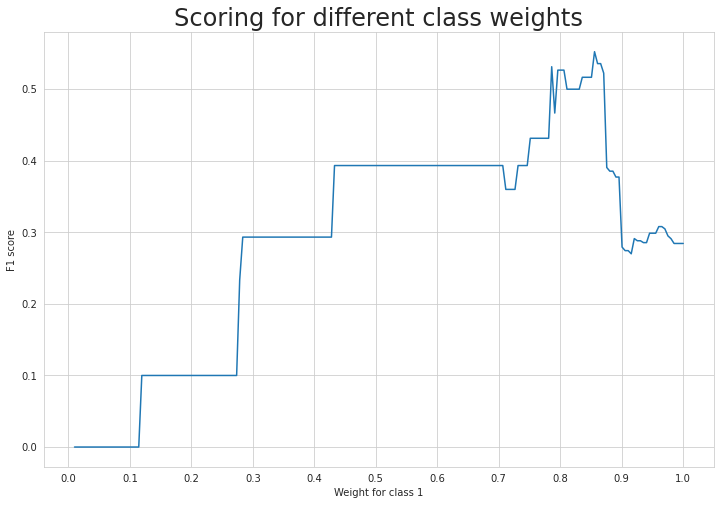

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report, confusion_matrix, recall_score
from sklearn.metrics import RocCurveDisplay

from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train_pca, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [75]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='newton-cg',class_weight='balanced', random_state=73)
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.005,0.009,0.01, 0.05,0.09,1,2,5]}
lr_final = grid_search(lr_model, param_grid = grid_values)
#Predicting on the train and test sets
y_pred_test_lr = lr_final.predict(X_test_pca)
y_pred_train_lr = lr_final.predict(X_train_pca)
recall_train_lr = recall_score(y_train, y_pred_train_lr)
recall_test_lr = recall_score(y_test, y_pred_test_lr)
print('Recall Score for the train dataset for Logistic Regression:', recall_train_lr)
print('Recall Score for the test dataset for Logistic Regression:', recall_test_lr)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters {'C': 1, 'penalty': 'l2'}
Best Score 0.6333333333333333 
Recall Score for the train dataset for Logistic Regression: 0.7142857142857143
Recall Score for the test dataset for Logistic Regression: 0.3


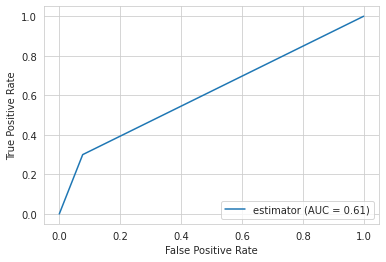

In [76]:
#Plotting the ROC curve
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test_lr)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='estimator')
display.plot()
plt.show()

**Decision Tree with PCA**

In [77]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=73)
param_dt = {
    'max_depth': range(1,15,1),
    'min_samples_leaf': range(5, 40, 1),
    'min_samples_split': range(5, 40, 2),
    'criterion': ["gini", "entropy"]
}
dt_final = grid_search(dt_model, param_grid=param_dt)
y_train_pred_dt = dt_final.predict(X_train_pca)
y_test_pred_dt = dt_final.predict(X_test_pca)
recall_train_dt = recall_score(y_train, y_train_pred_dt)
recall_test_dt = recall_score(y_test, y_test_pred_dt)
print('Recall Score for the train dataset for Decision Tree:', recall_train_dt)
print('Recall Score for the test dataset for Decision Tree:', recall_test_dt)

Fitting 5 folds for each of 17640 candidates, totalling 88200 fits
Best Parameters {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 34, 'min_samples_split': 5}
Best Score 1.0 
Recall Score for the train dataset for Decision Tree: 0.7857142857142857
Recall Score for the test dataset for Decision Tree: 0.6


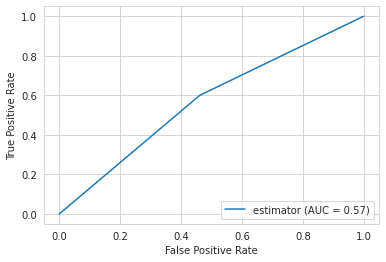

In [78]:
#Plotting the ROC curve
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_dt)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='estimator')
display.plot()
plt.show()

**XGBoost with PCA**

In [79]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

#Scale_pos_weight is assigned 100 to handle imbalanced data. 
xg_model = XGBClassifier(learning_rate=0.1, objective= 'binary:logistic', scale_pos_weight=89, seed=27)
param_xbg = {
    'max_depth':range(3,15,3),
    'min_child_weight':range(1,6,2),
    'n_estimators':range(10,50,10)
}
xg_final = grid_search(xg_model, param_grid=param_xbg)
y_train_pred_xg = xg_final.predict(X_train_pca)
y_test_pred_xg = xg_final.predict(X_test_pca)
recall_train_xg = recall_score(y_train, y_train_pred_xg)
recall_test_xg = recall_score(y_test, y_test_pred_xg)
print('Recall Score for the train dataset for XGBoost:', recall_train_xg)
print('Recall Score for the test dataset for XGBoost:', recall_test_xg)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters {'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 10}
Best Score 0.8666666666666668 
Recall Score for the train dataset for XGBoost: 1.0
Recall Score for the test dataset for XGBoost: 1.0


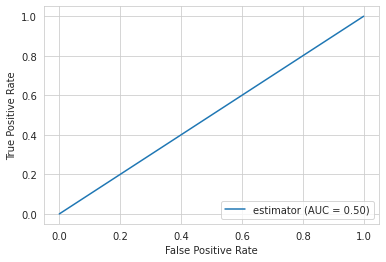

In [80]:
#Plotting the ROC curve
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_xg)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='estimator')
display.plot()
plt.show()

In [81]:
#Comparing the Results of Different Models
results_df = pd.DataFrame({
    'Model':['Logistic Regression','Decision Tree','XGBoost', 'RandomForest'],
    'Train Recall Score':[recall_train_lr, recall_train_dt, recall_train_xg, recall_train_rf ],
    'Test Recall Score':[recall_test_lr, recall_test_dt, recall_test_xg, recall_test_rf]
})
results_df

,Model,Train Recall Score,Test Recall Score
0,Logistic Regression,0.714286,0.3
1,Decision Tree,0.785714,0.6
2,XGBoost,1.000000,1.0
3,RandomForest,0.785714,0.3


Saving model with pickle and testing it with saved pickle model

In [82]:
#Save model using pickle
import pickle
pickle.dump(best_est, open('model_rf.pkl', 'wb'))
pickled_model = pickle.load(open('model_rf.pkl', 'rb'))


In [83]:
y_test_pred_picle_rf = pickled_model.predict(X_test)

In [86]:
test_score_df = pd.DataFrame()
test_score_df['Customer_name'] = customer_df.iloc[y_test.index]['Customer_name']
test_score_df['Actual Churn Status'] = y_test
test_score_df['Predicted Churn Status'] = y_test_pred_picle_rf
test_score_df.head()

,Customer_name,Actual Churn Status,Predicted Churn Status
69,Montreal_Police,0,1
54,idopte,0,0
37,ECB_European_Central_Bank,0,0
46,FRB,0,1
106,Thales-Internal,1,1
